### Prepare a model for glass classification using Random Forest
##### Data Description:
- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

##### Type: Type of glass: (class attribute)
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score


In [3]:
glass=pd.read_excel(r"D:\Data Science\Assignments\Random Forest\glass.xlsx",sheet_name=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

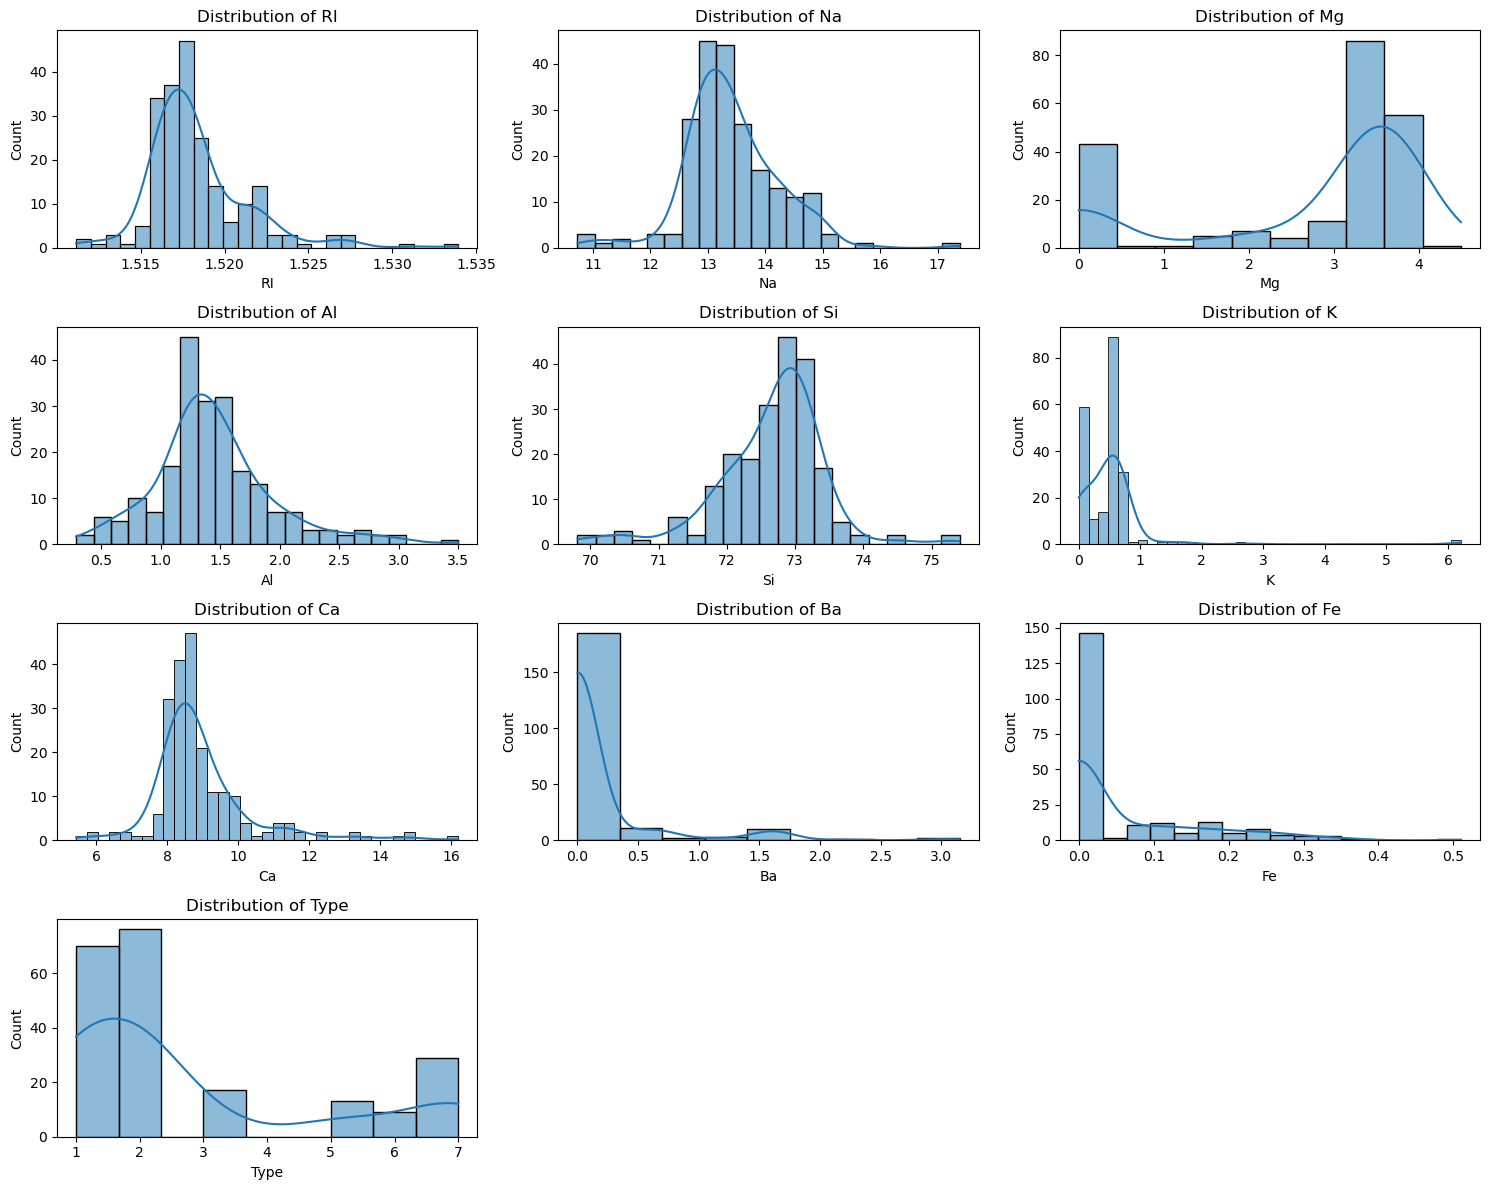

In [8]:
plt.figure(figsize=(15,12))
for i,col in enumerate(glass.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(glass[col],kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()

<Axes: >

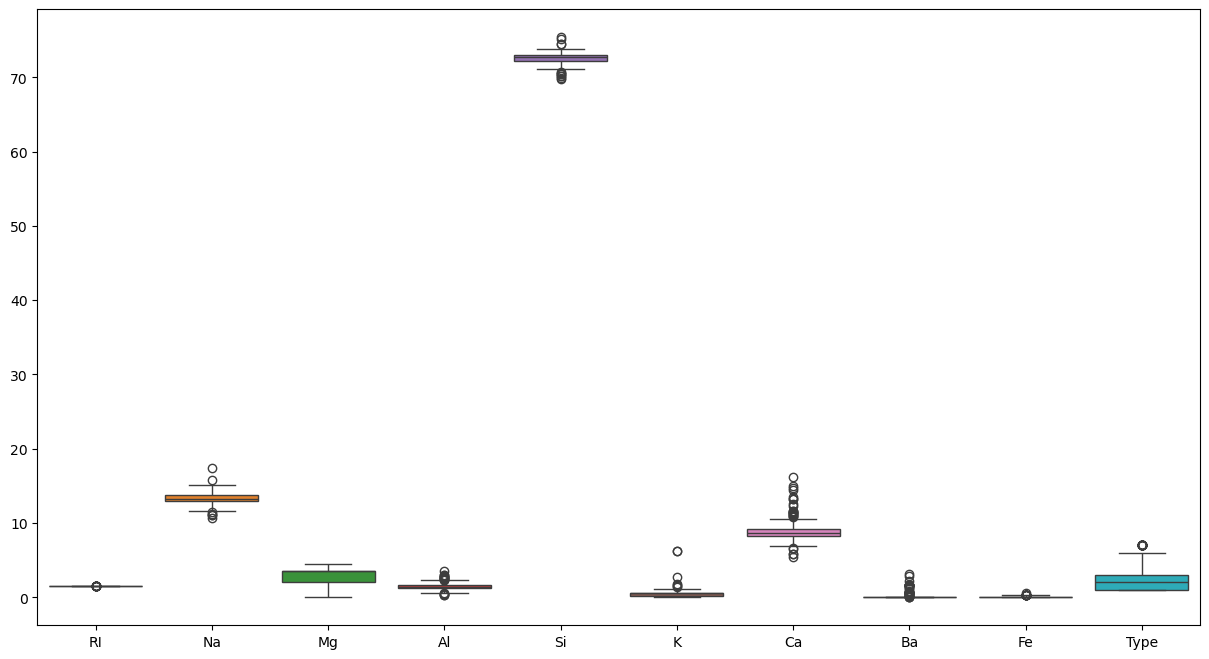

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(glass)

<Axes: >

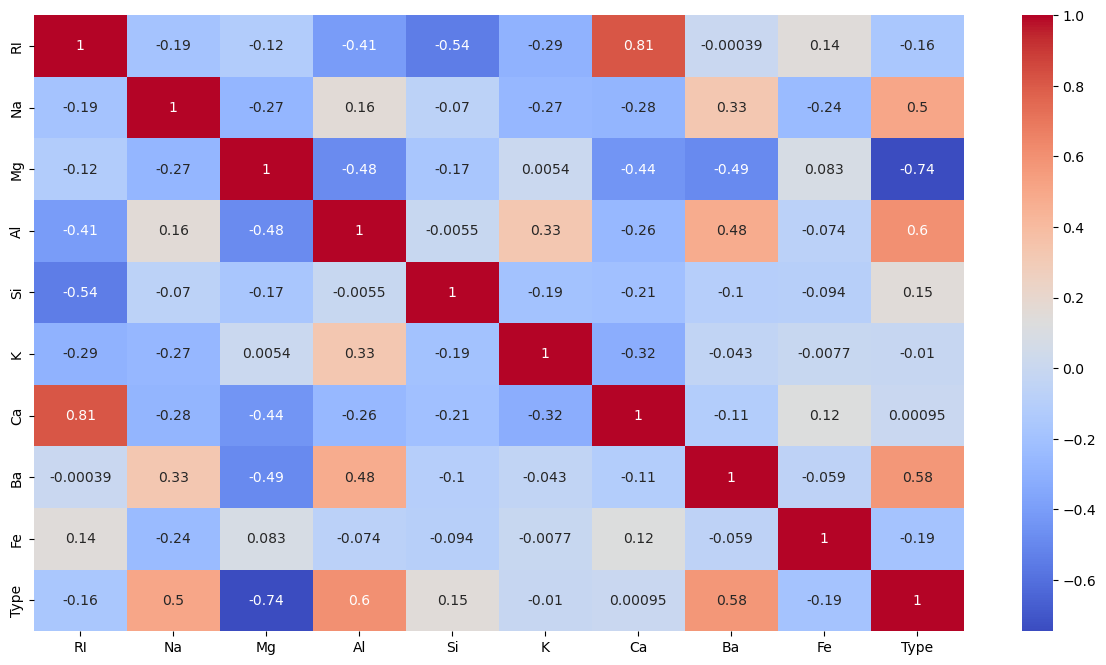

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(glass.corr(),annot=True,cmap='coolwarm')

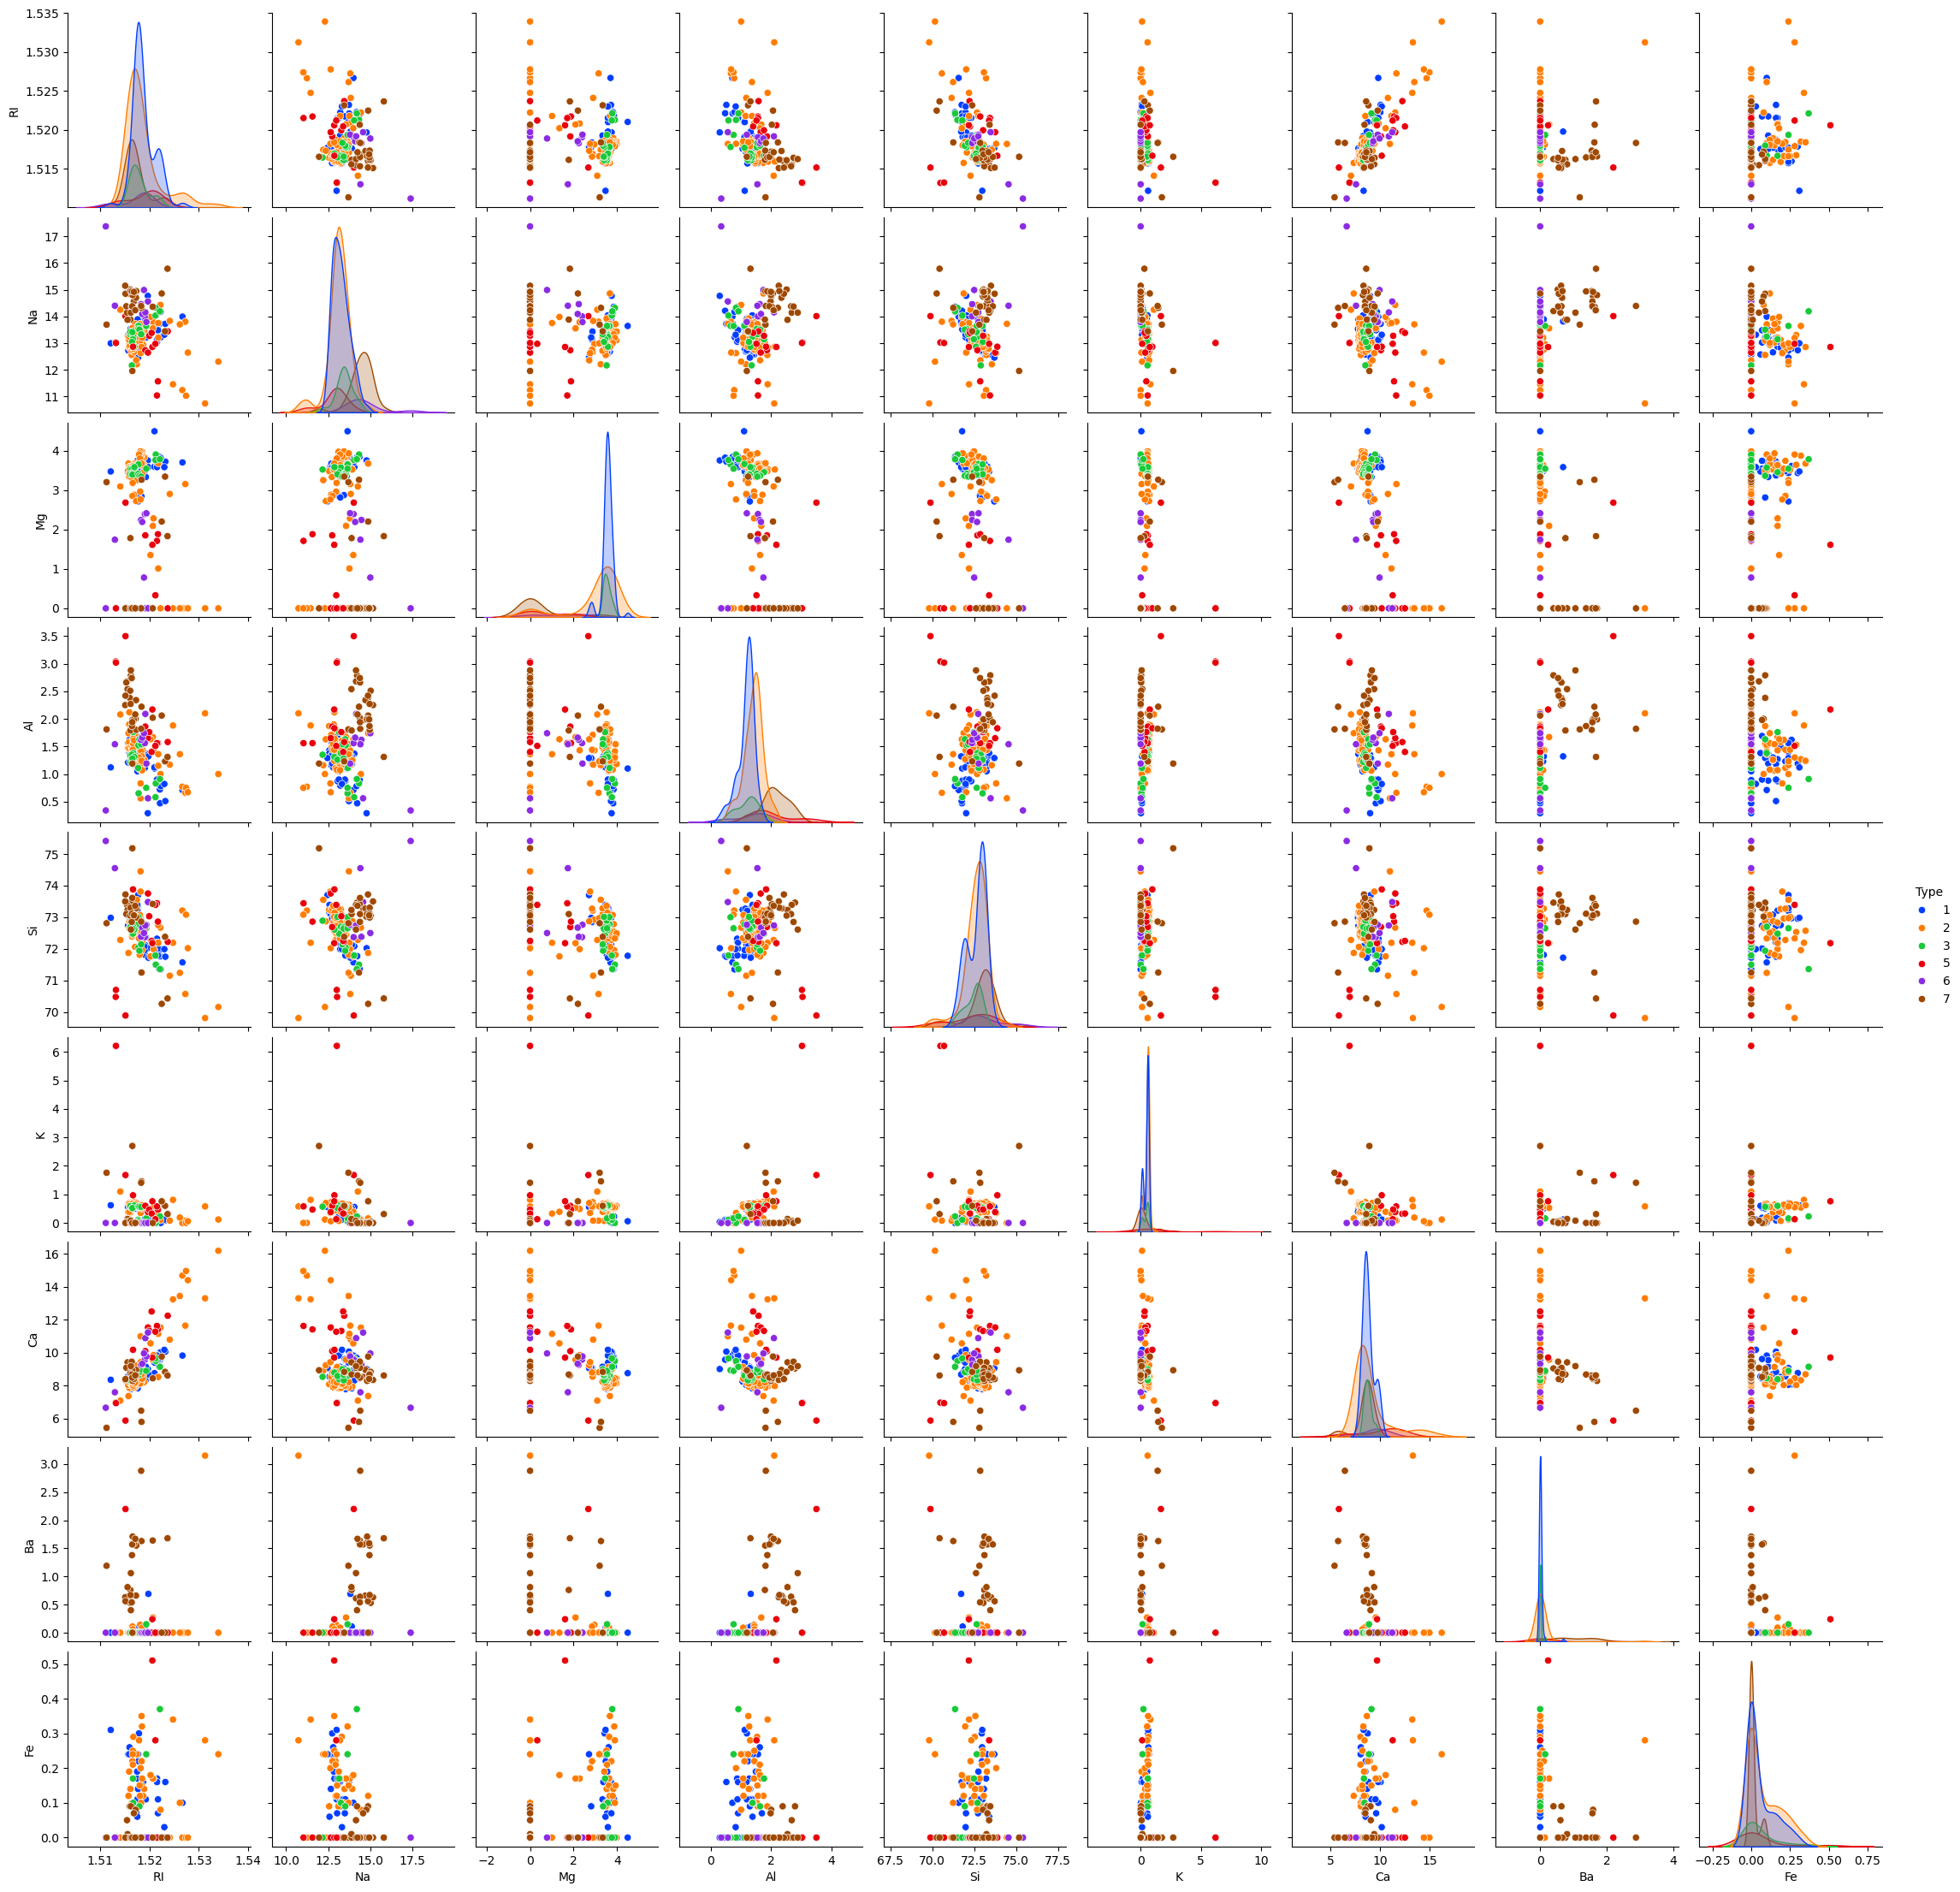

In [11]:
sns.pairplot(glass,hue='Type',palette='bright')

In [12]:
# feature selection
X=glass.iloc[:,:9]
Y=glass['Type']

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.transform(X_test)

In [14]:
params = {
    'n_estimators':[50,100,300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    params, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(scaled_X_train, Y_train)

C:\Users\snjvm\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 300]},
             scoring='accuracy')

### GridSearchCV
GridSearchCV is a critical tool for this assignment because it automates the process of Hyperparameter Optimization. Instead of manually guessing which settings work best for the RandomForestClassifier, it systematically evaluates every combination of parameters specified in the `params` dictionary.

Key Benefits

• Cross-Validation (CV): By using `cv=5`, the model is validated across different subsets of the data, ensuring the results are robust and not just a product of a lucky split.

• Accuracy Scoring: It ensures the final model is selected based on a consistent metric (accuracy), providing a clear objective for the "best" model.

• Reproducibility: It provides a structured way to document the search space for the model's best version.


In [15]:
print("--- Best Parameters for Random Forest ---")
print(grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(scaled_X_test)

print("\n--- Optimized Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))

--- Best Parameters for Random Forest ---
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

--- Optimized Random Forest Performance ---
Accuracy: 0.9070
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       1.00      0.79      0.88        14
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.91        43
   macro avg       0.95      0.91      0.92        43
weighted avg       0.92      0.91      0.91        43



- The optimized Random Forest model achieved a high accuracy of 90.7%.
- Through GridSearchCV, it was determined that using the 'entropy' criterion combined with 'balanced' class weights provided the best performance.
- The model showed exceptional strength in classifying rare categories (Type 5, 6, and 7)

In [16]:
# Standard Bagging (Pure bagging using standard trees)
bagging_model = BaggingClassifier(n_estimators=100)
bagging_model.fit(scaled_X_train, Y_train)
y_pred_bag=bagging_model.predict(scaled_X_test)
print(f"Accuracy score in bagging model: {accuracy_score(Y_test, y_pred_bag):.4f}")


# 5b. Boosting (Sequential improvement)
boosting_model = GradientBoostingClassifier(n_estimators=100)
boosting_model.fit(scaled_X_train, Y_train)
y_pred_boost=boosting_model.predict(scaled_X_test)
print(f"Accuracy score in boosting model: {accuracy_score(Y_test, y_pred_boost):.4f}")

Accuracy score in bagging model: 0.8605
Accuracy score in boosting model: 0.8837


#### Explain Bagging and Boosting. How are they different?
##### Bagging (Bootstrap Aggregating): 
It builds many models (like 100 trees) in parallel. Each tree gets a random subset of the data. They all vote, and the majority wins. It is great at reducing "Overfitting" (it keeps the model stable). Example: Random Forest.

##### Boosting: 
It builds models sequentially. Each new tree focuses only on the mistakes of the previous tree. It is great at reducing "Bias" (it makes the model more accurate). 

Example: Gradient Boosting.
#### The Main Difference: Bagging is about Parallel voting to reduce noise; Boosting is about Sequential learning to fix errors.

#### How do you handle imbalance in the data?
##### Class Weighting: We tell the model to "pay more attention" to the rare classes (we used class_weight='balanced')